In [1]:
from tensorflow.keras.layers import Input, Conv2D, Dense, ReLU, Flatten
from tensorflow.keras import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [4]:
#reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
inputs = Input(shape=(28,28,1))
out = Conv2D(1,3)(inputs)
out = ReLU()(out)
out = Flatten()(out)
out = Dense(10, activation='softmax')(out)
model = Model(inputs, out)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
re_lu (ReLU)                 (None, 26, 26, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 676)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                6770      
Total params: 6,780
Trainable params: 6,780
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
    )

In [8]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 1s 630us/step - loss: 25.0087 - acc: 0.7775 - val_loss: 0.9836 - val_acc: 0.8439
Epoch 2/10
1875/1875 [==============================] - 1s 516us/step - loss: 0.5950 - acc: 0.8797 - val_loss: 0.2956 - val_acc: 0.9179
Epoch 3/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.3047 - acc: 0.9162 - val_loss: 0.2921 - val_acc: 0.9207
Epoch 4/10
1875/1875 [==============================] - 1s 578us/step - loss: 0.2999 - acc: 0.9158 - val_loss: 0.3009 - val_acc: 0.9103
Epoch 5/10
1875/1875 [==============================] - 1s 533us/step - loss: 0.3126 - acc: 0.9144 - val_loss: 0.2853 - val_acc: 0.9210
Epoch 6/10
1875/1875 [==============================] - 1s 513us/step - loss: 0.3161 - acc: 0.9130 - val_loss: 0.3630 - val_acc: 0.9095
Epoch 7/10
1875/1875 [==============================] - 1s 560us/step - loss: 0.3093 - acc: 0.9162 - val_loss: 0.3176 - val_acc: 0.9085
Epoch 8/10
1875/1875 [=========================

In [9]:
X = X_test[0]
X.shape

(28, 28, 1)

In [10]:
y = model.predict(X_test[[0]])
y

array([[1.5824087e-11, 6.1573762e-21, 3.0310914e-11, 1.3590869e-04,
        2.2671966e-12, 3.1620637e-10, 1.7203982e-17, 9.9986279e-01,
        1.9324822e-09, 1.3374932e-06]], dtype=float32)

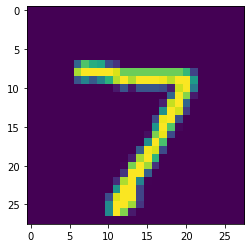

In [11]:
plt.imshow(X)

In [12]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
 array([[[[-0.01493068]],
 
         [[ 0.00165418]],
 
         [[ 0.01054219]]],
 
 
        [[[ 0.01664183]],
 
         [[ 0.01126822]],
 
         [[ 0.00358304]]],
 
 
        [[[-0.00954879]],
 
         [[-0.00813981]],
 
         [[ 0.0057789 ]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(1,) dtype=float32, numpy=array([0.02201873], dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(676, 10) dtype=float32, numpy=
 array([[-0.0390173 ,  0.44924182, -0.27243868, ...,  0.31146002,
         -0.28309578, -0.11028677],
        [-0.01179668,  0.55754834, -0.2430928 , ...,  0.10775765,
         -0.38104013, -0.06206248],
        [-0.03452352,  0.46869493, -0.24846792, ...,  0.2193103 ,
         -0.37002295, -0.06395224],
        ...,
        [ 0.01729827,  0.4342358 , -0.11721515, ...,  0.16974102,
         -0.10287298, -0.01753861],
        [ 0.04901088,  0.47999075, -0.00402304, ...,  0.255874 

In [13]:
in_json = {
    "in": X.astype(int).flatten().tolist(),
    "conv2d_weights": (model.weights[0].numpy()*1000).round().astype(int).flatten().tolist(),
    "conv2d_bias": (model.weights[1].numpy()*1000).round().astype(int).flatten().tolist(),
    "dense_weights":(model.weights[2].numpy()*1000).round().astype(int).flatten().tolist(),
    "dense_bias":(model.weights[3].numpy()*1000000).round().astype(int).flatten().tolist(),
}

In [14]:
import json

In [15]:
with open("mnist_input.json", "w") as f:
    json.dump(in_json, f)